# Atividade Árvore de Decisão

Rhenan Dias Morais

GU3009254

In [59]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
planetas = sns.load_dataset('planets')
planetas = planetas.drop(columns=["number"])
planetas = planetas.drop(columns=["year"])

planetas.columns

Index(['method', 'orbital_period', 'mass', 'distance'], dtype='object')

<AxesSubplot:xlabel='method', ylabel='count'>

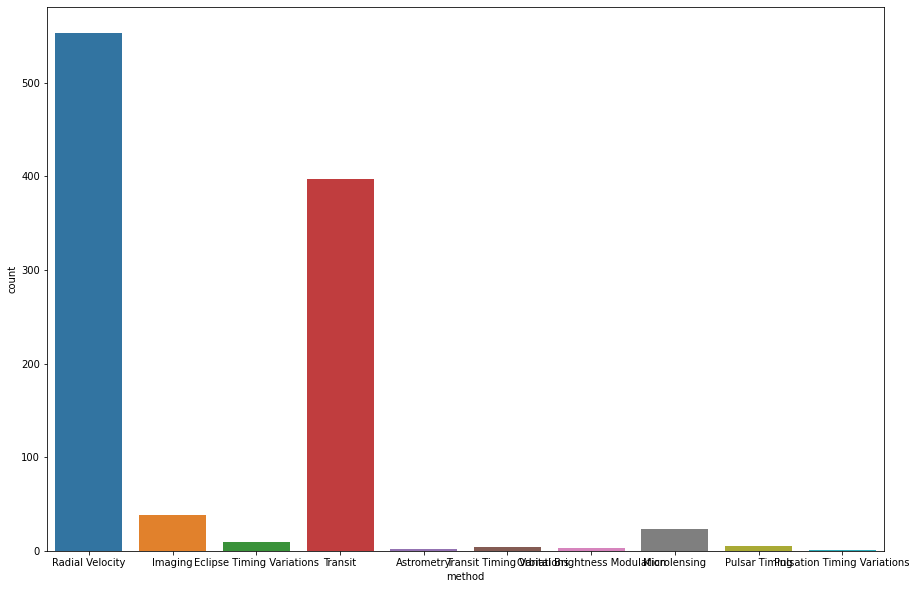

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="method", data=planetas, ax=ax)

In [62]:
planetas = planetas[(planetas.method == "Radial Velocity") |  (planetas.method == "Transit")]

In [63]:
planetas["method"].value_counts()

Radial Velocity    553
Transit            397
Name: method, dtype: int64

<AxesSubplot:xlabel='method', ylabel='count'>

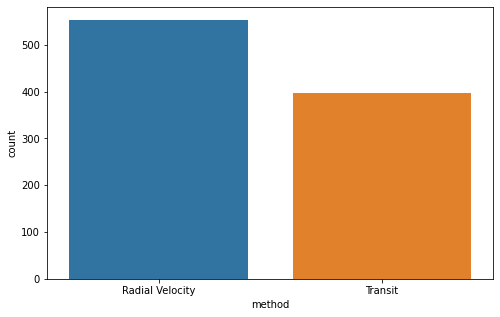

In [64]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="method", data=planetas, ax=ax)

In [65]:
transit_subset = planetas.loc[planetas["method"] == "Transit", :]
radial_velocity_subset = planetas.loc[planetas["method"] == "Radial Velocity", :]

print("Quantidade de 'Transit': ", len(transit_subset))
print("Quantidade de 'Radial Velocity': ", len(radial_velocity_subset))

sampled_radial_velocity = radial_velocity_subset.sample(len(transit_subset))

print("Quantidade balanceada de 'Radial Velocity': ", len(sampled_radial_velocity))

planetas = pd.concat([transit_subset, sampled_radial_velocity], ignore_index=True)

Quantidade de 'Transit':  397
Quantidade de 'Radial Velocity':  553
Quantidade balanceada de 'Radial Velocity':  397


<AxesSubplot:xlabel='method', ylabel='count'>

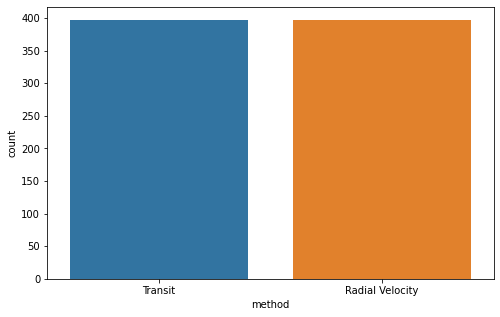

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="method", data=planetas, ax=ax)

In [67]:
values = {"orbital_period": planetas["orbital_period"].median(),
          "mass": planetas["mass"].median(),
          "distance": planetas["distance"].median()}

planetas = planetas.fillna(value=values)

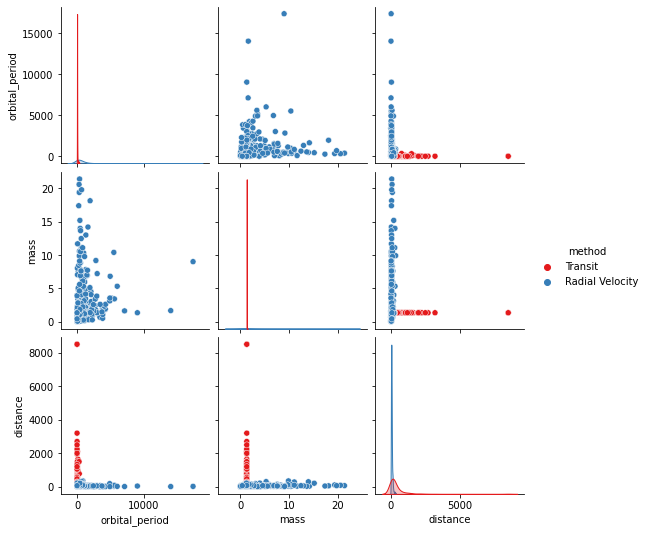

In [68]:
sns.pairplot(planetas, hue='method', palette='Set1')

In [69]:
# Definindo valores que serão utilizados
X = planetas[["orbital_period", "mass", "distance"]]
y = planetas['method']

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [70]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [71]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

Radial Velocity       0.98      0.97      0.98       103
        Transit       0.97      0.98      0.97        96

       accuracy                           0.97       199
      macro avg       0.97      0.98      0.97       199
   weighted avg       0.97      0.97      0.97       199



<AxesSubplot:xlabel='Predito', ylabel='Atual'>

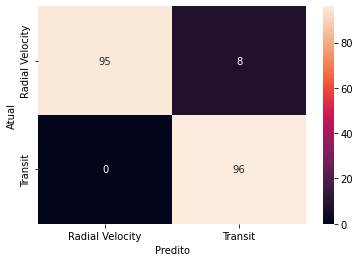

In [72]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(confusion_matrix, annot=True)

### Visualizando a árvore

In [73]:
from six import StringIO
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
import pydot

features = list(planetas.columns[1:])
classes = [x for x in np.unique(planetas["method"])]

features, classes

(['orbital_period', 'mass', 'distance'], ['Radial Velocity', 'Transit'])

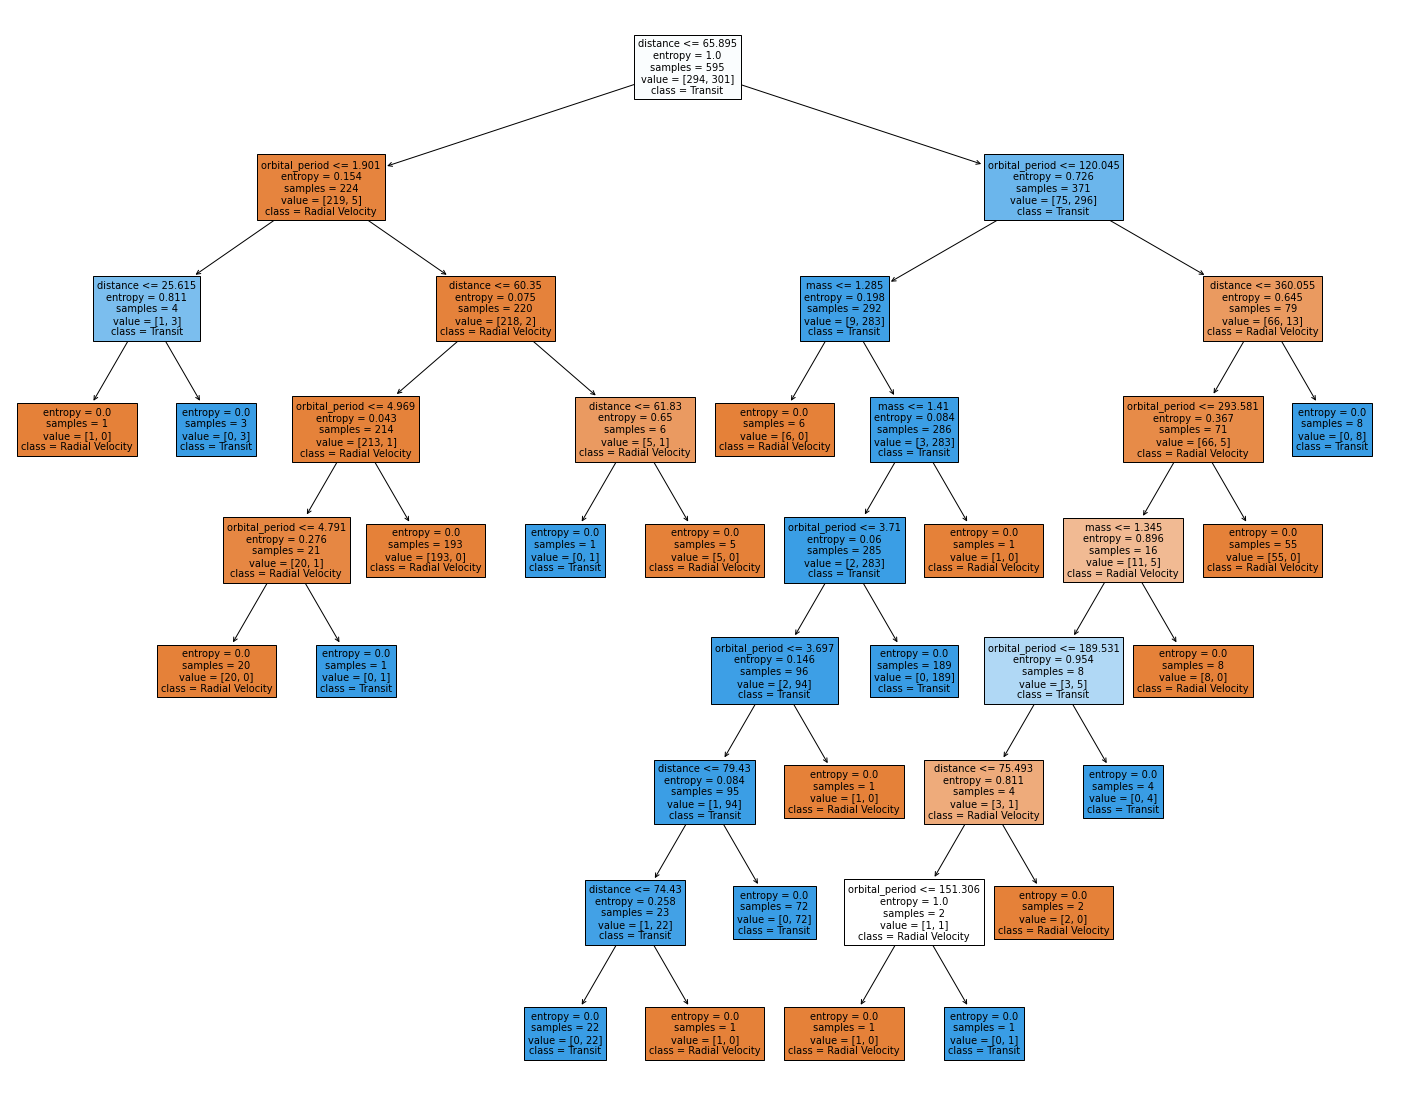

In [74]:
fig = plt.figure(figsize=(25,20))
figure = plot_tree(dtree, feature_names=features,class_names=classes,filled=True)

### FLoresta aleatória

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

[[101   2]
 [  1  95]]


<AxesSubplot:xlabel='Predito', ylabel='Atual'>

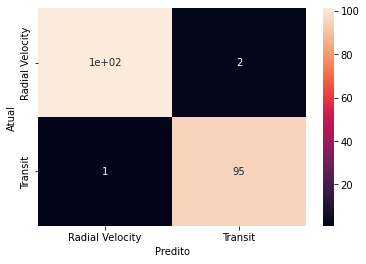

In [77]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, rfc_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(confusion_matrix, annot=True)

In [78]:
print(classification_report(y_test,rfc_pred))

                 precision    recall  f1-score   support

Radial Velocity       0.99      0.98      0.99       103
        Transit       0.98      0.99      0.98        96

       accuracy                           0.98       199
      macro avg       0.98      0.99      0.98       199
   weighted avg       0.98      0.98      0.98       199

